### Multi Node Example ####

 This example demonstrates how to create a multi-node graph using the `langgraph` library.
 The graph consists of two nodes: one for generating a greeting 
 and another for appending additional information to the greeting.



In [88]:
#!/usr/bin/env python3
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [89]:
class AgentState(TypedDict):
    """State for the agent."""
    name: str
    age: int
    city: str
    result: str 

In [90]:
def greeting(state: AgentState) -> str:
    """Generate a greeting message."""
    state['result'] = f"Hello {state['name']}"
    return state

In [91]:
def append_info(state: AgentState) -> str:
    """Process the message and return the result."""
    state['result'] += f", you are {state['age']} years old and live in {state['city']}."
    return state

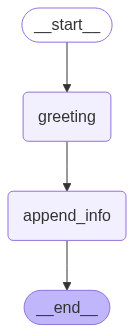

In [92]:
graph = StateGraph(AgentState)
graph.add_node("greeting", greeting)
graph.add_node("append_info", append_info)
graph.add_edge(START, "greeting")
graph.add_edge("greeting", "append_info")
graph.add_edge("append_info", END)

# Example usage
initial_state = {
    'name': 'Alice',
    'age': 30,
    'city': 'Wonderland'
}

graph.compile(name="Multi_Node_Example")


In [93]:
final_state = graph.compile(name="Multi_Node_Example")
result = final_state.invoke(initial_state)
print(result['result'])

Hello Alice, you are 30 years old and live in Wonderland.
